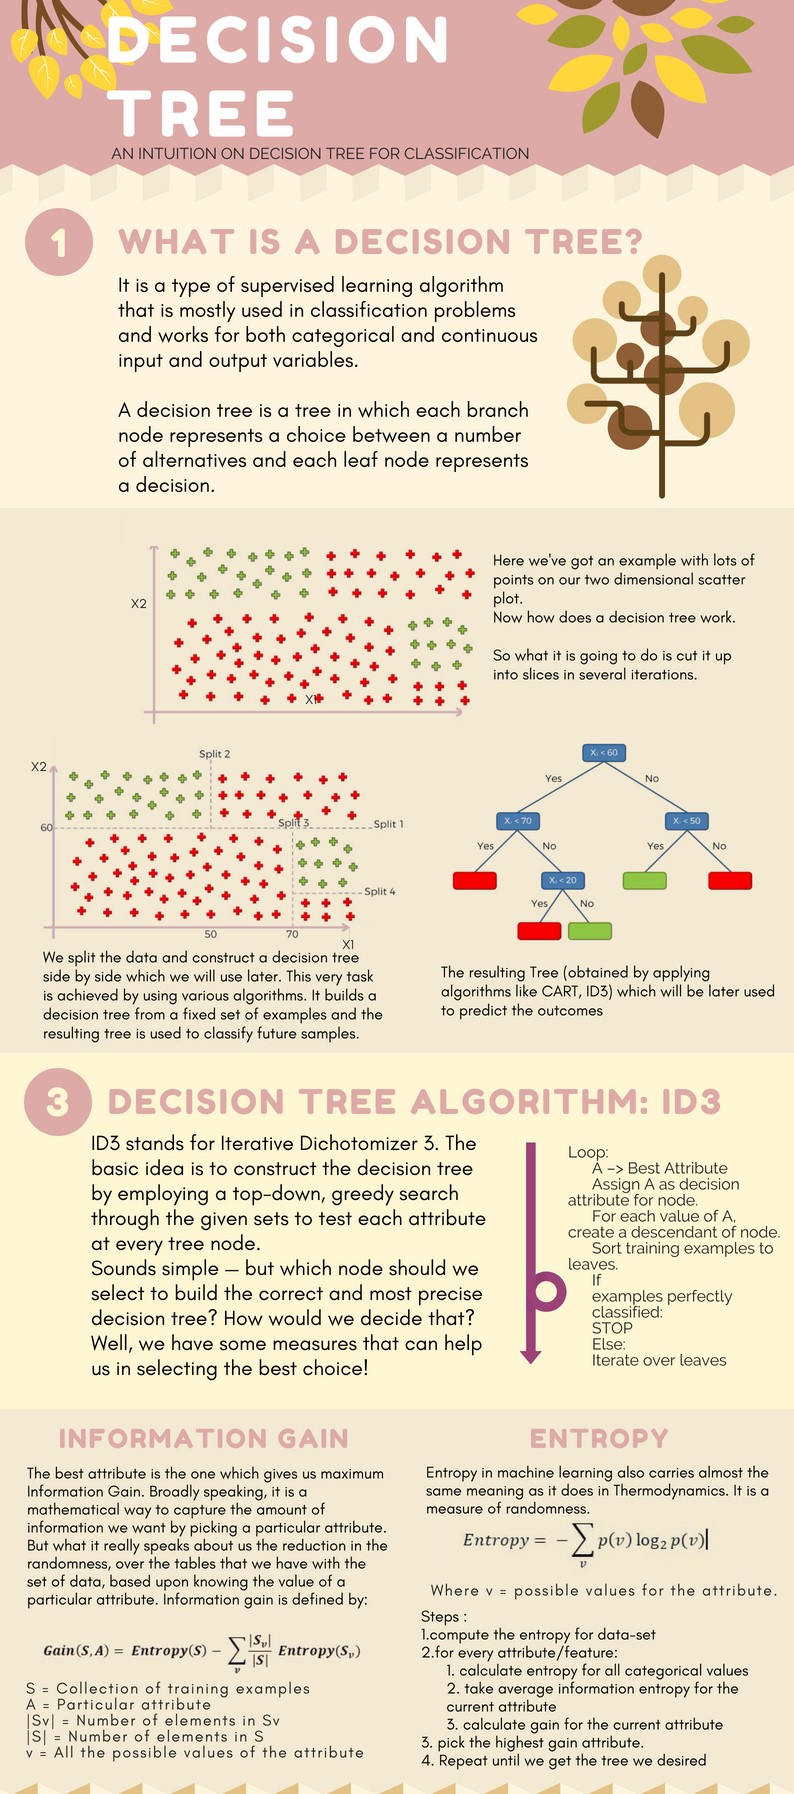

# Simple implementation Social network ads data set:

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values
dataset.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [2]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


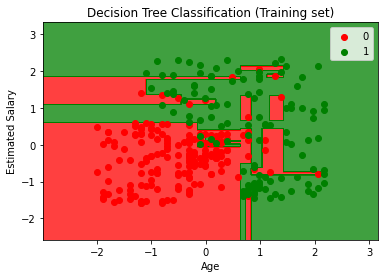

In [3]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


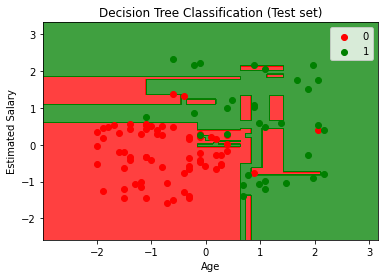

In [4]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Detailed implementation using titanic data set:

# Decision tree:

Decisions Trees (nonparametric MLA) is a powerful group of supervised Machine Learning models that can be used for both classification and regression. With the rise of the XGBoost library, Decision Trees have been some of the Machine Learning models to deliver the best results at competitions.

## Gradient Boosting Classifier
The gradient boosting (GB) method is a technique based on the competition-winning concept in which weak learners are
boosted in an iterative way by optimizing a loss function. This approach tends toward focusing on the observations that were difficult to predict in the preceding iterations and synthesizing an ensemble of weak learners. The optimization of the loss function is used to create the prediction model. The algorithm, then, uses decision trees as a weak learner to make predictions by minimizing the loss function 

# How can an algorithm be represented as a tree?

For this let’s consider a very basic example that uses titanic data set for predicting whether a passenger will survive or not. Below model uses 3 features/attributes/columns from the data set, namely sex, age and sibsp (number of spouses or children along).

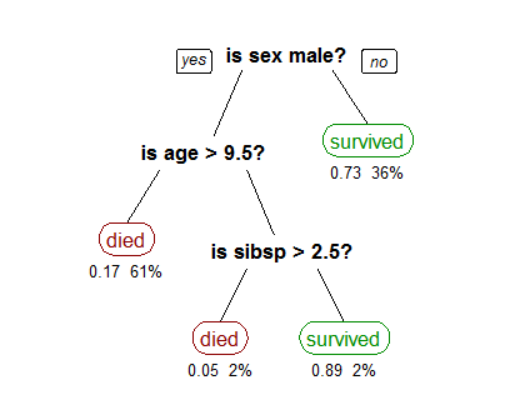

A decision tree is drawn upside down with its root at the top. In the image on the left, the bold text in black represents a condition/internal node, based on which the tree splits into branches/edges. The end of the branch that doesn’t split anymore is the decision/leaf, in this case, whether the passenger died or survived, represented as red and green text respectively.

Although, a real dataset will have a lot more features and this will just be a branch in a much bigger tree, but you can’t ignore the simplicity of this algorithm. The feature importance is clear and relations can be viewed easily. This methodology is more commonly known as learning decision tree from data and above tree is called Classification tree as the target is to classify passenger as survived or died. Regression trees are represented in the same manner, just they predict continuous values like price of a house. In general, Decision Tree algorithms are referred to as CART or Classification and Regression Trees.

So, what is actually going on in the background? Growing a tree involves deciding on which features to choose and what conditions to use for splitting, along with knowing when to stop. As a tree generally grows arbitrarily, you will need to trim it down for it to look beautiful.

Lets start with a common technique used for splitting.

# Recursive Binary Splitting:

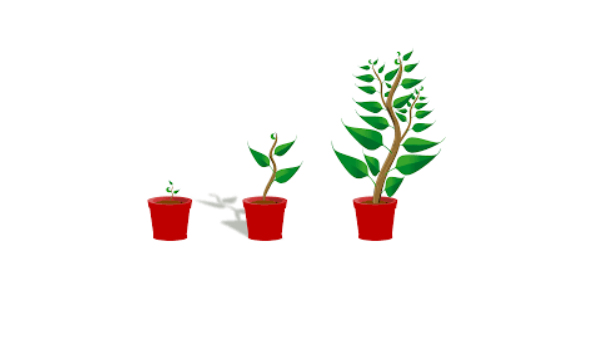

In this procedure all the features are considered and different split points are tried and tested using a cost function. The split with the best cost (or lowest cost) is selected.

Consider the earlier example of tree learned from titanic dataset. In the first split or the root, all attributes/features are considered and the training data is divided into groups based on this split. We have 3 features, so will have 3 candidate splits. Now we will calculate how much accuracy each split will cost us, using a function. The split that costs least is chosen, which in our example is sex of the passenger. This algorithm is recursive in nature as the groups formed can be sub-divided using same strategy. Due to this procedure, this algorithm is also known as the greedy algorithm, as we have an excessive desire of lowering the cost. This makes the root node as best predictor/classifier.

# Cost of Split:

Let us talk about the cost function used for both, classification and regression. In both techniques, the cost function is trying to find similar branches.

Regression: sum(y — prediction)²

To exemplify, let’s say we are predicting the price of houses. Now as discussed earlier, the decision tree will start splitting by considering each feature.

The mean responses of a particular group are considered as a prediction for that group. The function mentioned above is applied to all data point and the cost is calculated.

Classification : G = sum(pk * (1 — pk))

This is the equation of calculating the Gini score. Gini score gives an idea of how good a split is. Here, pk is the proportion of same class inputs present in a particular group.

A perfect class purity occurs when a group contains all inputs from the same class, in that case, pk is either 0 or 1 and G=0.

# When to Stop Splitting:

Just like in the stock market you must know when to exit to book maximum profit or minimum loss, in the decision tree, you must know when to stop splitting.

With large datasets comes a large set of features which brings high complexity to the trees and there is a chance of overfitting. Hence, we need to know when to stop. One way of doing this is to set a minimum number of training inputs to use on each leaf.

For example, we can use a minimum of 10 passengers to reach a decision, so we ignore any leaf that takes less than 10 passengers. On the contrary, another way is to set the maximum depth of your model.

# What makes a Good Split:


In order to determine which feature we should split on first, we need to score every possible split so we can choose the split with the highest score. Our goal would be to perfectly split the data. If, for instance, all women survived the crash and all men didn’t survive, splitting on Sex would be a perfect split. This is rarely going to happen with a real dataset, but we want to get as close to this as possible.

The mathematical term we’ll be measuring is called information gain. This will be a value from 0 to 1 where 0 is the information gain of a useless split and 1 is the information gain of a perfect split. In the next couple parts we will define gini impurity and entropy which we will use to define information gain. First we will discuss the intuition of what makes a good split.

Let’s consider a couple possible splits for the Titanic dataset. We’ll see how it splits the data and why one is better than the other.

First, let’s trying splitting on Age. Since Age is a numerical feature, we need to pick a threshold to split on. Let’s say we split on Age<=30 and Age>30. Let’s see how many passengers we have on each side, and how many of them survived and how many didn’t.

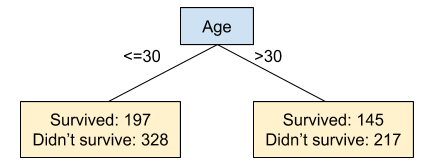

On both sides, we have about 40% of the passengers surviving. Thus we haven’t really gained anything from splitting the data this way.

Now let’s try splitting on Sex.

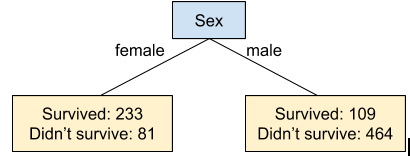

We can see on the female side that the vast majority survived. On the male side, the vast majority didn’t survive. This is a good split.

What we’re going for is homogeneity (or purity) on each side. Ideally we would send all the passengers who survived to one side and those who didn’t survive to the other side. We’ll look at two different mathematical measurements of purity. We’ll use the purity values to calculate the information gain.    
A good choice of a feature to split on results in each side of the split being pure. A set is pure if all the datapoints belong to the same class (either survived or didn’t survive).


# Gini Impurity:

Gini impurity is a measure of how pure a set is. We’ll later see how we can use the gini impurity to calculate the information gain.

We calculate the gini impurity on a subset of our data based on how many datapoints in the set are passengers that survived and how many are passengers who didn’t survive. It will be a value between 0 and 0.5 where 0.5 is completely impure (50% survived and 50% didn’t survive) and 0 is completely pure (100% in the same class).

The formula for gini is as follows. p is the percent of passengers who survived. Thus (1-p) is the percent of passengers who didn’t survive.  
$gini = 2 * p * ( 1-p)$  
Here’s a graph of the gini impurity.  

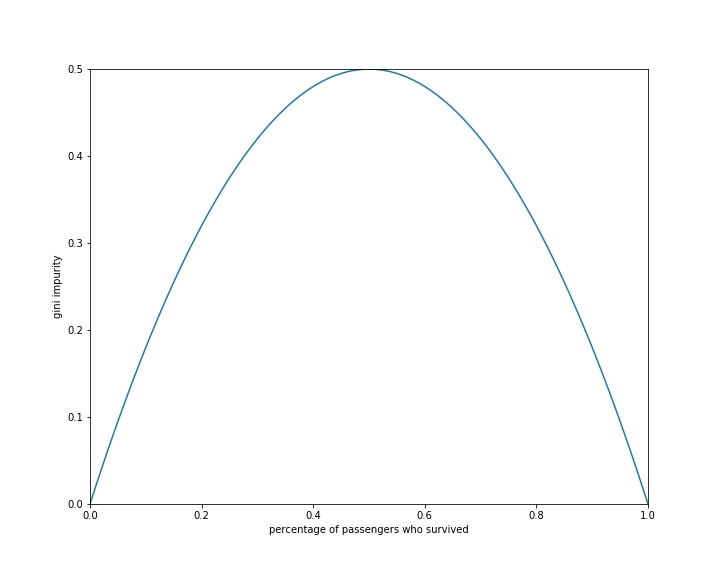

We can see that the maximum value is 0.5 when exactly 50% of the passengers in the set survived. If all the passengers survived or didn’t survive (percent is 0 or 1), then the value is 0.

Let’s calculate the gini impurity for our examples from the previous part. First we had a split on Age<=30 and Age>30. Let’s calculate the gini impurities of the two sets that we create.

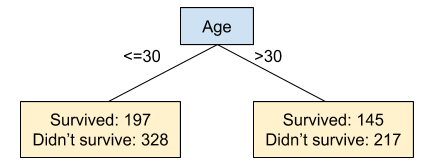

On the left, for the passengers with Age<=30, let’s first calculate the percent of passengers who survived:

Percent of passengers who survived = 197/(197+328) = 0.3752  
Percent of passengers who didn’t survive = 1 - 0.375 = 0.6248  

Now let’s use that to calculate the gini impurity:  
2 * 0.3752 * 0.6248 = 0.4689  
We can see that this value is close to 0.5, the maximum value for gini impurity. This means that the set is impure.  

Now let’s calculate the gini impurity for the right side, passengers with Age>30.  
2 * 145/(145+217) * 217/(145+217) = 0.4802  
This value is also close to 0.5, so again we have an impure set.  


Now let’s look at the gini values for the other split we tried, splitting on Sex.  

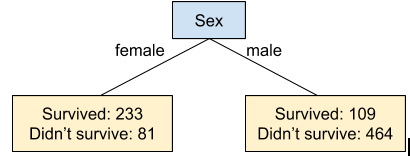

On the left side, for female passengers, we calculate the following value for the gini impurity.  
2 * 233/(233+81) * 81/(233+81) = 0.3828  
On the right side, for male passengers, we get the following value.  
2 * 109/(109+464) * 464/(109+464) = 0.3081  
Both of these values are smaller than the gini values for splitting on Age, so we determine that splitting on the Sex feature is a better choice.   
Right now we have two values for each potential split. The information gain will be a way of combining them into a single value.   

# Entropy:

Entropy is another measure of purity. It will be a value between 0 and 1 where 1 is completely impure (50% survived and 50% didn’t survive) and 0 is completely pure (100% the same class).

The formula for entropy comes from physics. p again is the percent of passengers who survived.

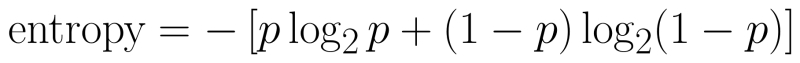

Here’s a graph of the entropy function.

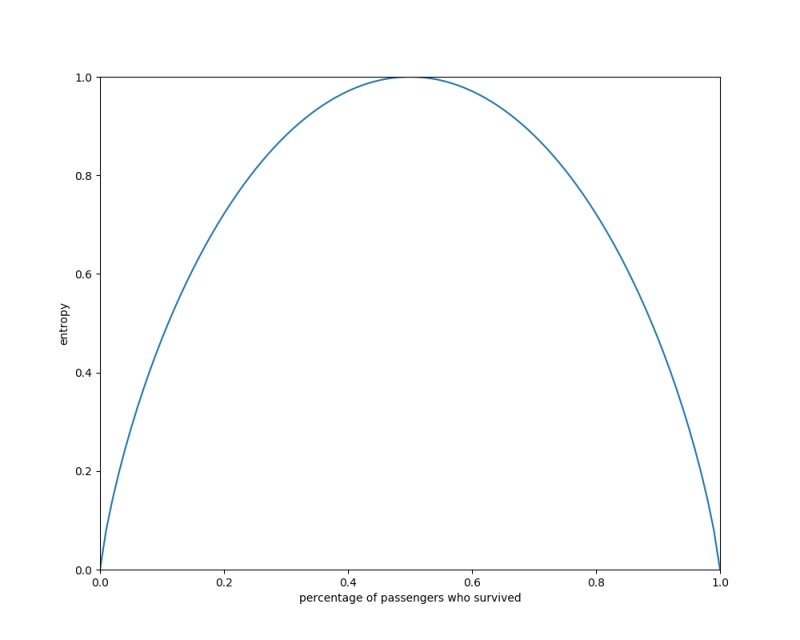

You can see it has a similar shape to the gini function. Like the gini impurity, the maximum value is when 50% of the passengers in our set survived, and the minimum value is when either all or none of the passengers survived. The shape of the graphs are a little different. You can see that the entropy graph is a little fatter.  

Now let’s calculate the entropy values for the same two potential splits.  

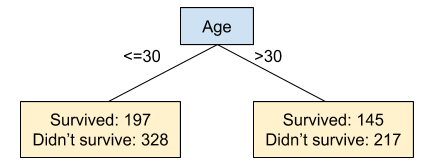

On the left (Age<=30):  
p = 197/(197+328) = 0.3752  
Entropy = -(0.375 * log(0.375) + (1-0.375) * log(1-0.375)) = 0.9546  
And on the right (Age>30):  
p = 145/(145+217) = 0.4006  
Entropy =  -(0.401 * log(0.401) + (1-0.401) * log(1-0.401)) =  0.9713  

These values are both close to 1, which means the sets are impure.

Now let’s do the same calculate for the split on the Sex feature.

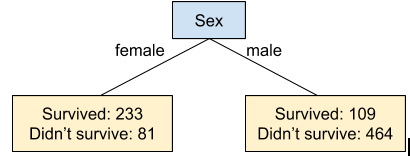

On the left (female):  
p = 233/(233+81) = 0.7420  
Entropy = -(p * log(p) + (1-p) * log(1-p)) = 0.8237  
And on the right (male):  
p = 109/(109+464) = 0.1902  
Entropy =  -(p * log(p) + (1-p) * log(1-p)) = 0.7019  
You can see that these entropy values are smaller than the entropy values above, so this is a better split.  
It’s not obvious whether gini or entropy is a better choice. It often won’t make a difference, but you can always cross validate to compare a Decision Tree with entropy and a Decision Tree with gini to see which performs better.  

# Information Gain:

Now that we have a way of calculating a numerical value for impurity, we can define information gain.

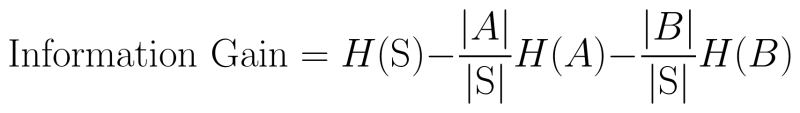

H is our impurity measure (either Gini impurity or entropy). S is the original dataset and A and B are the two sets we’re splitting the dataset S into. In the first example above, A is passengers with Age<=30 and B is passengers with Age>30. In the second example, A is female passengers and B is male passengers. |A| means the size of A.

Let’s calculate this value for our two examples. Let’s use Gini impurity as our impurity measure.

We’ve already calculated most of the Gini impurity values, though we need to calculate the Gini impurity of the whole set. There are 342 passengers who survived and 545 passengers who didn’t survive, out of a total of 887 passengers, so the gini impurity is as follows:  
Gini = 2 * 342/887 * 545/887 = 0.4738  
Again, here’s the first potential split.  


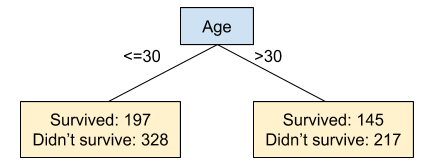

Note that we have 197+328=525 passengers on the left (Age<=30) and 145+217=362 passengers on the right (Age>30). Thus, pulling in the gini impurity values that we calculated before, we get the following information gain:  
Information gain = 0.4738 - 525/887 * 0.4689 - 362/887 * 0.4802 = 0.0003  
This value is very small meaning we gain very little from this split.  

Now let’s calculate the information gain for splitting on Sex.

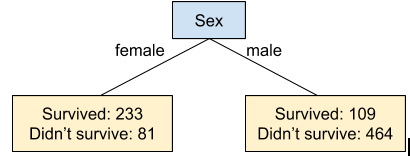

We have 233+81=314 passengers on the left (female) and 109+464=573 passengers on the right (male). Here is the information gain:  
Information gain = 0.4738 - 314/887 * 0.3828 - 573/887 * 0.3081 = 0.1393  
Thus we can see that the information gain is much better for this split. Therefore, splitting on Sex is a much better choice when building our decision tree than splitting on Age with threshold 30.  

# Building the Decision Tree:

We’ve built up the foundations we need for building the Decision Tree. Here’s the process we go through:

To determine how to do the first split, we go over every possible split and calculate the information gain if we used that split. For numerical features like Age, PClass and Fare, we try every possible threshold. Splitting on the Age threshold of 50 means that datapoints with Age<=50 are one group and those with Age>50 are the other. Thus since there are 89 different ages in our dataset, we have 88 different splits to try for the age feature!

We need to try all of these potential splits:  
1. Sex (male | female)  
2. Pclass (1 or 2 | 3)  
3. Pclass (1 | 2 or 3)  
4. Age (0 | >0)  
5. Age (<=1 | >1)  
6. Age (<=2 | >2)  
7. etc….  

There is 1 potential split for Sex, 2 potential splits for Pclass, and 88 potential splits for Age. There are 248 different values for Fare, so there are 247 potential splits for this feature. If we’re only considering these four features, we have 338 potential splits to consider.

For each of these splits we calculate the information gain and we choose the split with the highest value.

Now, we do the same thing for the next level. Say we did the first split on Sex. Now for all the female passengers, we try all of the possible splits for each of the features and choose the one with the highest information gain. We can split on the same feature twice if that feature has multiple possible thresholds. Sex can only be split on once, but the Fare and Age features can be split on many times.

Independently, we do a similar calculation for the male passengers and choose the split with the highest information gain. Thus we may have a different second split for male passengers and female passengers.

We continue doing this process until we have no more features to split on.
This is a lot of things to try, but we just need to throw computation power at it. It does make Decision Trees a little slow to build, but once the tree is built, it is very fast to make a prediction.

# Decision Tree Diagram:

Let’s look at an example Decision Tree for the Titanic dataset. Within each internal node, we have the feature and threshold to split on, the number of samples and the distribution of the sames (# didn’t survived vs survived).

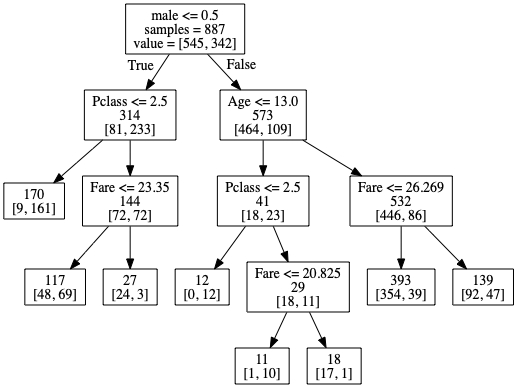

To interpret this, let’s start by looking at the root node. It says:

male <= 0.5  
samples = 887  
value = [545, 342]  

This means that the first split will be on the male column. If the value is <=0.5 (meaning the passenger is female) we go to the left child and if the value is >0.5 (meaning the passenger is male) we go to the right child.

There are 887 datapoints to start and 545 are negative cases (didn’t survive) and 342 are positive (did survive).

If you look at the two children of the root node, we can see how many datapoints were sent each way based on splitting on Sex. There are 314 female passengers in our dataset and 573 male passengers.

You can see that the second split for female passengers is different from the second split for male passengers.

# How to Make a Prediction:

Let’s look at the same decision tree diagram again.

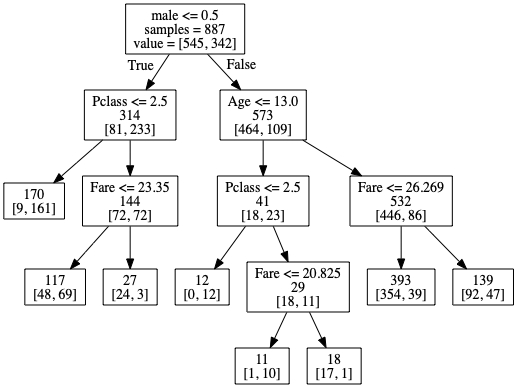

Let’s say we’d like to use this Decision Tree to make a prediction for a passenger with these values:

Sex: female  
Pclass: 3  
Fare: 25  
Age: 30  

We ask the question at each node and go to the left child if the answer is yes and to the right if the answer is no.

We start at the root node.

Is the value for the male feature <= 0.5? (This question could also be asked as "Is the passenger female?")
Since the answer is yes, we go to the left child.

Is the Pclass <= 0.5?  
Since the answer is no, we go to the right child.

Is the Fare <= 23.35?  
Since the answer is no, we go to the right child.

Now we’re at a leaf node. Here’s the path we took highlighted.

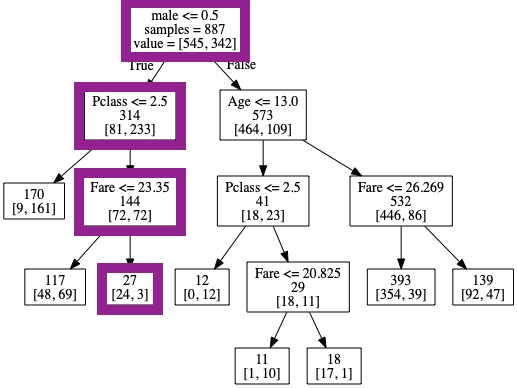


The leaf node that we end at has the following text:  
27  
[24, 3]  

This means there are 27 datapoints in our dataset that also land at this leaf node. 24 of them didn’t survive and 3 of them survived. This means our prediction is that the passenger didn’t survive.

# DecisionTreeClassifier Class:


Just like with Logistic Regression, scikit-learn has a Decision Tree class. The code for building a Decision Tree model is very similar to building a Logistic Regression model. Scikit-learn did this intentionally so that it is easy to build and compare different models for the same dataset.

Here’s the import statement.  
from sklearn.tree import DecisionTreeClassifier  

Now we can apply the same methods that we used with the LogisticRegression class: fit (to train the model), score (to calculate the accuracy score) and predict (to make predictions).  

We first create a DecisionTreeClassifier object.  
model = DecisionTreeClassifier()  

We do a train/test split using a random_state so that every time we run the code we will get the same split.  
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)  

Then we use the fit method to train the model.  
model.fit(X_train, y_train)  

We can use the predict method to see what the model predicts. Here we can see the prediction for a male passenger in Pclass 3, who is 22 years old, has 1 sibling/spouse on board, has 0 parents/children on board, and paid a fare of 7.25.  


In [5]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print(model.predict([[3, True, 22, 1, 0, 7.25]]))

[0]


# Scoring a Decision Tree Model:

We can use the score and predict methods to get the accuracy, precision and recall scores.

In [6]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score
import numpy as np

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

kf = KFold(n_splits=5, shuffle=True, random_state=10)
dt_accuracy_scores = []
dt_precision_scores = []
dt_recall_scores = []
lr_accuracy_scores = []
lr_precision_scores = []
lr_recall_scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    dt_accuracy_scores.append(dt.score(X_test, y_test))
    dt_y_pred = dt.predict(X_test)
    dt_precision_scores.append(precision_score(y_test, dt_y_pred))
    dt_recall_scores.append(recall_score(y_test, dt_y_pred))
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    lr_accuracy_scores.append(lr.score(X_test, y_test))
    lr_y_pred = lr.predict(X_test)
    lr_precision_scores.append(precision_score(y_test, lr_y_pred))
    lr_recall_scores.append(recall_score(y_test, lr_y_pred))
print("Decision Tree")
print("  accuracy:", np.mean(dt_accuracy_scores))
print("  precision:", np.mean(dt_precision_scores))
print("  recall:", np.mean(dt_recall_scores))
print("Logistic Regression")
print("  accuracy:", np.mean(lr_accuracy_scores))
print("  precision:", np.mean(lr_precision_scores))
print("  recall:", np.mean(lr_recall_scores))

Decision Tree
  accuracy: 0.7857677902621722
  precision: 0.723449382701576
  recall: 0.7207347799259564
Logistic Regression
  accuracy: 0.7970354853043865
  precision: 0.7618898922983288
  recall: 0.6900529617441382


We can use k-fold cross validation to get an accurate measure of the metrics and compare the values with a Logistic Regression model. We use a random_state when creating the KFold object so that we will get the same results every time.
You can see that the accuracy and precision of the Logistic Regression model is higher, and the recalls of the two models are about the same.  
The Logistic Regression model performs better, though we may still want to use a Decision Tree for its interpretability.

# Gini vs Entropy:

The default impurity criterion in scikit-learn’s Decision Tree algorithm is the Gini Impurity. However, they’ve also implemented entropy and you can choose which one you’d like to use when you create the DecisionTreeClassifier object.

To build a Decision Tree that uses entropy, we’ll need to set the criterion parameter to entropy. Here’s the code for building a Decision Tree that uses entropy instead of the Gini Impurity.

dt = DecisionTreeClassifer(criterion='entropy')

Now we can compare a Decision Tree using gini with a Decision Tree using entropy. We first create a k-fold split since when we’re comparing two models we want them to use the same train/test splits to be fair. Then we do a k-fold cross validation with each of the two possible models. We calculate accuracy, precision and recall for each of the two options.

In [7]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

kf = KFold(n_splits=5, shuffle=True)
for criterion in ['gini', 'entropy']:
    print("Decision Tree - {}".format(criterion))
    accuracy = []
    precision = []
    recall = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        dt = DecisionTreeClassifier(criterion=criterion)
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_test)
        accuracy.append(accuracy_score(y_test, y_pred))
        precision.append(precision_score(y_test, y_pred))
        recall.append(recall_score(y_test, y_pred))
    print("accuracy:", np.mean(accuracy))
    print("precision:", np.mean(precision))
    print("recall:", np.mean(recall), '\n')
    print()

Decision Tree - gini
accuracy: 0.7768234621976766
precision: 0.7162691035437716
recall: 0.7027194121678065 


Decision Tree - entropy
accuracy: 0.7723036881863772
precision: 0.7042498786491921
recall: 0.7080201477086617 




We see very little difference in the performance of Gini vs Entropy. This is expected as they aren’t really very different functions. It’s rare to find a dataset where the choice would make a difference.

# Visualizing Decision Trees:

If you want to create a png image of your graph, like the ones shown in this module, you can use scikit-learn's export_graphviz function.

First we import it.
from sklearn.tree import export_graphviz

dot_file = export_graphviz(dt, feature_names=feature_names)

Then we use the export_graphviz function. Here dt is a Decision Tree object and feature_names is a list of the feature names. Graph objects are stored as .dot files which can be the GraphViz program. Our goal is to save a png image file. We will be able to convert the dot file to a png file, so we first save the dot file to a variable., so we save the dot file created by the export_graphviz function so that we can convert it to a png.

We can then use the graphviz module to convert it to a png image format.
import graphviz  
graph = graphviz.Source(dot_file)  

Finally, we can use the render method to create the file. We tell it the filename and file format. By default, it will create extra files that we are not interested in, so we add cleanup to tell it to get rid of them.
graph.render(filename='tree', format='png', cleanup=True)

Now you should have a file called tree.png on your computer. Here's the code for visualizing the tree for the Titanic dataset with just the Sex and Pclass features.

In [8]:
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image

feature_names = ['Pclass', 'male']
X = df[feature_names].values
y = df['Survived'].values

dt = DecisionTreeClassifier()
dt.fit(X, y)

dot_file = export_graphviz(dt, feature_names=feature_names)
graph = graphviz.Source(dot_file)
graph.render(filename='tree', format='png', cleanup=True)

'tree.png'

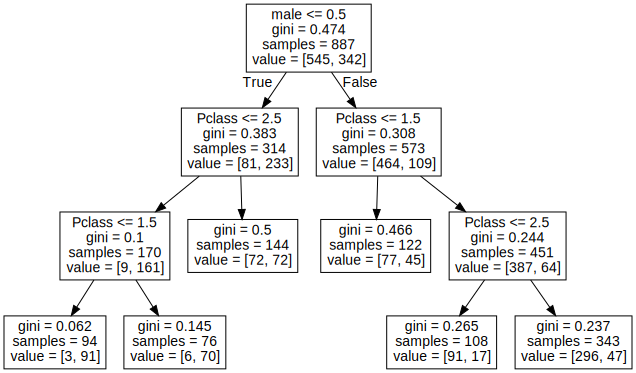

In [9]:
graph

# Tendency to Overfit:

Recall that overfitting is when we do a good job of building a model for the training set, but it doesn’t perform well on the test set. Decision Trees are incredibly prone to overfitting. Since they can keep having additional nodes in the tree that split on features, the model can really dig deep into the specifics of the training set. Depending on the data, this might result in a model that doesn’t capture the true nature of the data and doesn’t generalize.

Maybe we just have a single datapoint that goes to a leaf node. It might not make sense to have that additional split.

Let’s look at a diagram of a Decision Tree for the Titanic dataset. This is the resulting tree when we build a Decision Tree with scikit-learn on the entire dataset. We’re just looking at a portion of the Decision Tree since it’s so large. We’ve highlighted a particular path of interest.

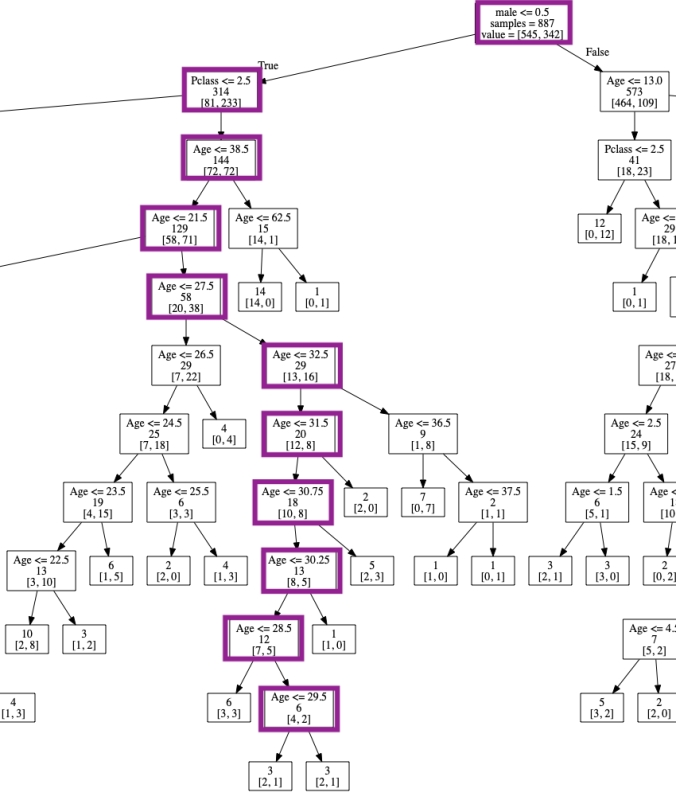

If you follow the highlighted path, you’ll see that we split on Sex, Pclass, and then split on Age 9 times in a row with different thresholds. This results in a graph that’s very nitpicky about age. A female passenger in Pclass 3 of age 31 goes to a different leaf node than a similar passenger of age 30.5 or 30 or 29. The model predicts that a female passenger age 35 survives, age 32 doesn’t survive, age 31 survives, and age 30 doesn’t survive. This is probably too fine-grained and is giving single datapoints from our dataset too much power. You can see that the leaf nodes all have few datapoints and often only one.  
If you let a Decision Tree keep building, it may create a tree that’s overfit and doesn’t capture the essence of the data.

# Pruning:

In order to solve these issues, we do what’s called pruning the tree. This means we make the tree smaller with the goal of reducing overfitting.

There are two types of pruning: pre-pruning & post-pruning. In pre-pruning, we have rules of when to stop building the tree, so we stop building before the tree is too big. In post-pruning we build the whole tree and then we review the tree and decide which leaves to remove to make the tree smaller.

## Pre-pruning:

We’re going to focus on pre-pruning techniques since they are easier to implement. We have a few options for how to limit the tree growth. Here are some commonly used pre-pruning techniques:  
• Max depth: Only grow the tree up to a certain depth, or height of the tree. If the max depth is 3, there will be at most 3 splits for each datapoint.  
• Leaf size: Don’t split a node if the number of samples at that node is under a threshold  
• Number of leaf nodes: Limit the total number of leaf nodes allowed in the tree  

Pruning is a balance. For example, if you set the max depth too small, you won’t have much of a tree and you won’t have any predictive power. This is called underfitting. Similarly if the leaf size is too large, or the number of leaf nodes too small, you’ll have an underfit model.  
There’s no hard science as to which pre-pruning method will yield better results. In practice, we try a few different values for each parameter and cross validate to compare their performance.

### Pre-pruning Parameters:

Scikit-learn has implemented quite a few techniques for pre-pruning. In particular, we will look at three of the parameters: max_depth, min_samples_leaf, and max_leaf_nodes. 

Prepruning Technique 1: Limiting the depth

We use the max_depth parameter to limit the number of steps the tree can have between the root node and the leaf nodes.

Prepruning Technique 2: Avoiding leaves with few datapoints

We use the min_samples_leaf parameter to tell the model to stop building the tree early if the number of datapoints in a leaf will be below a threshold.

Prepruning Technique 3: Limiting the number of leaf nodes

We use max_leaf_nodes to set a limit on the number of leaf nodes in the tree.

Here’s the code for creating a Decision Tree with the following properties:
• max depth of 3  
• minimum samples per leaf of 2  
• maximum number of leaf nodes of 10  
dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, max_leaf_nodes=10)  

You can now train the model and test it as we’ve done before.  

You can use as many or as few of the parameters as you’d like.  
To determine the best values for the pre-pruning parameters, we’ll use cross validation to compare several potential options.  

#### Grid Search

We’re not going to be able to intuit best values for the pre-pruning parameters. In order to decide on which to use, we use cross validation and compare metrics. We could loop through our different options like we did in the Lesson on Decision Trees in Scikit-learn, but scikit-learn has a grid search class built in that will do this for us.

The class is called GridSearchCV. We start by importing it.  
from sklearn.model_selection import GridSearchCV  

GridSearchCV has four parameters that we’ll use:  
1. The model (in this case a DecisionTreeClassifier)  
2. Param grid: a dictionary of the parameters names and all the possible values  
3. What metric to use (default is accuracy)  
4. How many folds for k-fold cross validation  


In [10]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

param_grid = {
    'max_depth': [5, 15, 25],
    'min_samples_leaf': [1, 3],
    'max_leaf_nodes': [10, 20, 35, 50]}

# the grid search object. We’ll use the above parameter grid, 
# set the scoring metric to the F1 score, and do a 5-fold cross validation.
dt = DecisionTreeClassifier()
gs = GridSearchCV(dt, param_grid, scoring='f1', cv=5)
# We use the best_params_ attribute to see which model won.
gs.fit(X, y)
print("best score:", gs.best_score_)

best score: 0.7738842268718757


# Types of Decision Trees:

Types of decision tree is based on the __type of target variable__ we have. It can be of two types:

- __Categorical Variable Decision Tree__: <br/>
 - Decision Tree which has __categorical target variable__ then it called as categorical variable decision tree.
- __Continuous Variable Decision Tree__:<br/>
 - Decision Tree has __continuous target variable__ then it is called as Continuous Variable Decision Tree.<br/>
 
__Example__:<br/>
- Let’s say we have a problem to predict whether a customer will pay his renewal premium with an insurance company (__Yes/ No__).<br/> For this we are predicting values for categorical variable. So, the decision tree approach that will be used is __Categorical Variable Decision Tree.__ <br/>
- Now, suppose insurance company does not have income details for all customers. But, we know that this is an important variable, then we can build a decision tree to predict customer income based on occupation, product and various other variables.<br/> In this case, we are predicting values for continuous variable. So , This approach is called __Continuous Variable Decision Tree__.

# pros and cons:

## Computation:

A decision tree is very computationally expensive to build. This is because at every node we are trying every single feature and threshold as a possible split. We have to calculate the information gain of each of these possible splits each time. This is computationally very expensive.

Predicting with a decision tree on the other hand, is computational very inexpensive. You just need to ask a series of yes/no questions about the datapoint to get to the prediction.

## Performance:

Decision Trees can perform decently well depending on the data, though as we have discussed, they are prone to overfitting. Since a leaf node can have just one datapoint that lands there, it gives too much power to individual datapoints.

## Interpretability:

The biggest reason that people like choosing decision trees is because they are easily interpretable. 

---

# Titanic data set

In [11]:
# 1. Importing important libraries
# Implemennts milti-dimensional array and matrices
import numpy as np                                                
# For data manipulation and analysis
import pandas as pd                                                
# import pandas_profiling
# Plotting library for Python programming language and it's numerical mathematics extension NumPy
import matplotlib.pyplot as plt                                    
import seaborn as sns                                             
# Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output

In [12]:
# 2. Data loading and description 
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [13]:
# Missing Values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


3. Preprocessing the data  
Dealing with missing values  
Dropping/Replacing missing entries of Embarked.  
Replacing missing values of Age with median values.  
Dropping the column 'Cabin' as it has too many null values.  
Replacing 0 values of fare with median values.  

In [15]:
df.Embarked = df.Embarked.fillna(df['Embarked'].mode()[0])

In [16]:
median_age = df.Age.median()
df.Age.fillna(median_age, inplace = True)

In [17]:
df.drop('Cabin', axis = 1,inplace = True)

In [18]:
df['Fare']=df['Fare'].replace(0,df['Fare'].median())

In [19]:
# Creating a new feature named FamilySize.
df['FamilySize'] = df['SibSp'] + df['Parch']+1

In [20]:
# Segmenting Sex column as per Age, Age less than 15 as Child, Age greater than 15 as Males and Females as per their gender.
df['GenderClass'] = df.apply(lambda x: 'child' if x['Age'] < 15 else x['Sex'],axis=1)

In [21]:
df[df.Age<15].head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,GenderClass
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,5,child
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,2,child


In [22]:
df[df.Age>15].head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,GenderClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,female


In [23]:
# Dummification of GenderClass & Embarked.
df = pd.get_dummies(df, columns=['GenderClass','Embarked'], drop_first=True)

In [24]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,2,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,2,1,0,0,0


In [25]:
# Dropping columns 'Name' , 'Ticket' , 'Sex' , 'SibSp' and 'Parch'
titanic = df.drop(['Name','Ticket','Sex','SibSp','Parch'], axis = 1)
titanic.head()

,PassengerId,Survived,Pclass,Age,Fare,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,7.2500,2,0,1,0,1
1,2,1,1,38.0,71.2833,2,1,0,0,0
2,3,1,3,26.0,7.9250,1,1,0,0,1
3,4,1,1,35.0,53.1000,2,1,0,0,1
4,5,0,3,35.0,8.0500,1,0,1,0,1


Text(0.5, 1.0, 'Pair Plot')

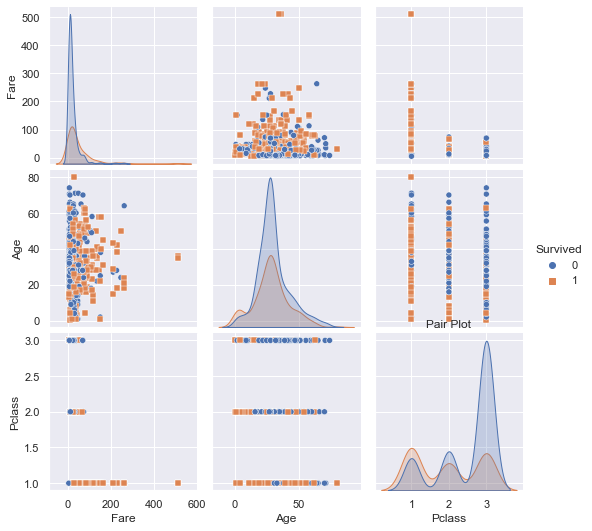

In [26]:
# Drawing pair plot to know the joint relationship between 'Fare' , 'Age' , 'Pclass' & 'Survived'
sns.pairplot(df[["Fare","Age","Pclass","Survived"]],vars = ["Fare","Age","Pclass"],hue="Survived", dropna=True,markers=["o", "s"])
plt.title('Pair Plot')

Observing the diagonal elements,

More people of Pclass 1 survived than died (First peak of red is higher than blue)  
More people of Pclass 3 died than survived (Third peak of blue is higher than red)  
More people of age group 20-40 died than survived.  
Most of the people paying less fare died.  

Text(0.5, 1.0, 'Correlation between features')

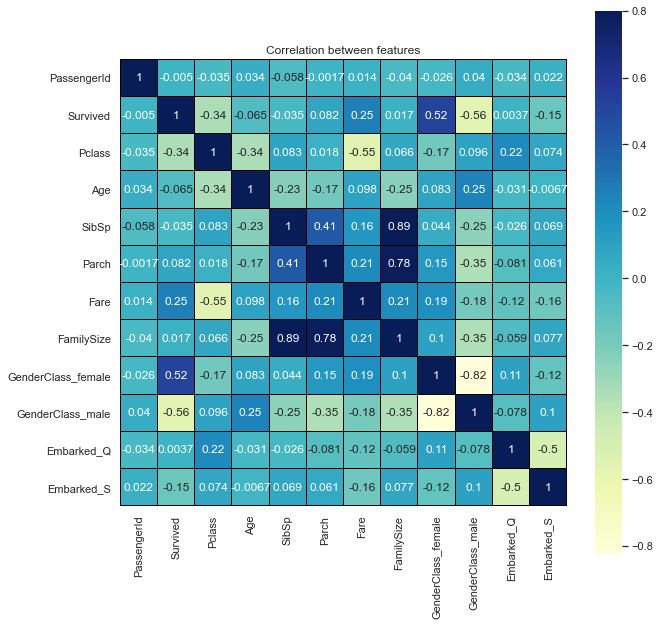

In [27]:
# Establishing coorelation between all the features using heatmap.
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

- __Age and Pclass are negatively corelated with Survived.__
- FamilySize is made from Parch and SibSb only therefore high positive corelation among them.
- __Fare and FamilySize__ are __positively coorelated with Survived.__
- With high corelation we face __redundancy__ issues.

In [28]:
# 4. Decision Tree  
# Preparing X and y using pandas

X = titanic.loc[:,titanic.columns != 'Survived']
X.head()

,PassengerId,Pclass,Age,Fare,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
0,1,3,22.0,7.2500,2,0,1,0,1
1,2,1,38.0,71.2833,2,1,0,0,0
2,3,3,26.0,7.9250,1,1,0,0,1
3,4,1,35.0,53.1000,2,1,0,0,1
4,5,3,35.0,8.0500,1,0,1,0,1


In [35]:
y = titanic['Survived']
y.head(5)

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [36]:
# Splitting X and y into training and test datasets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [39]:
# Decision Tree in scikit-learn

from sklearn import tree
model = tree.DecisionTreeClassifier(random_state = 0)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

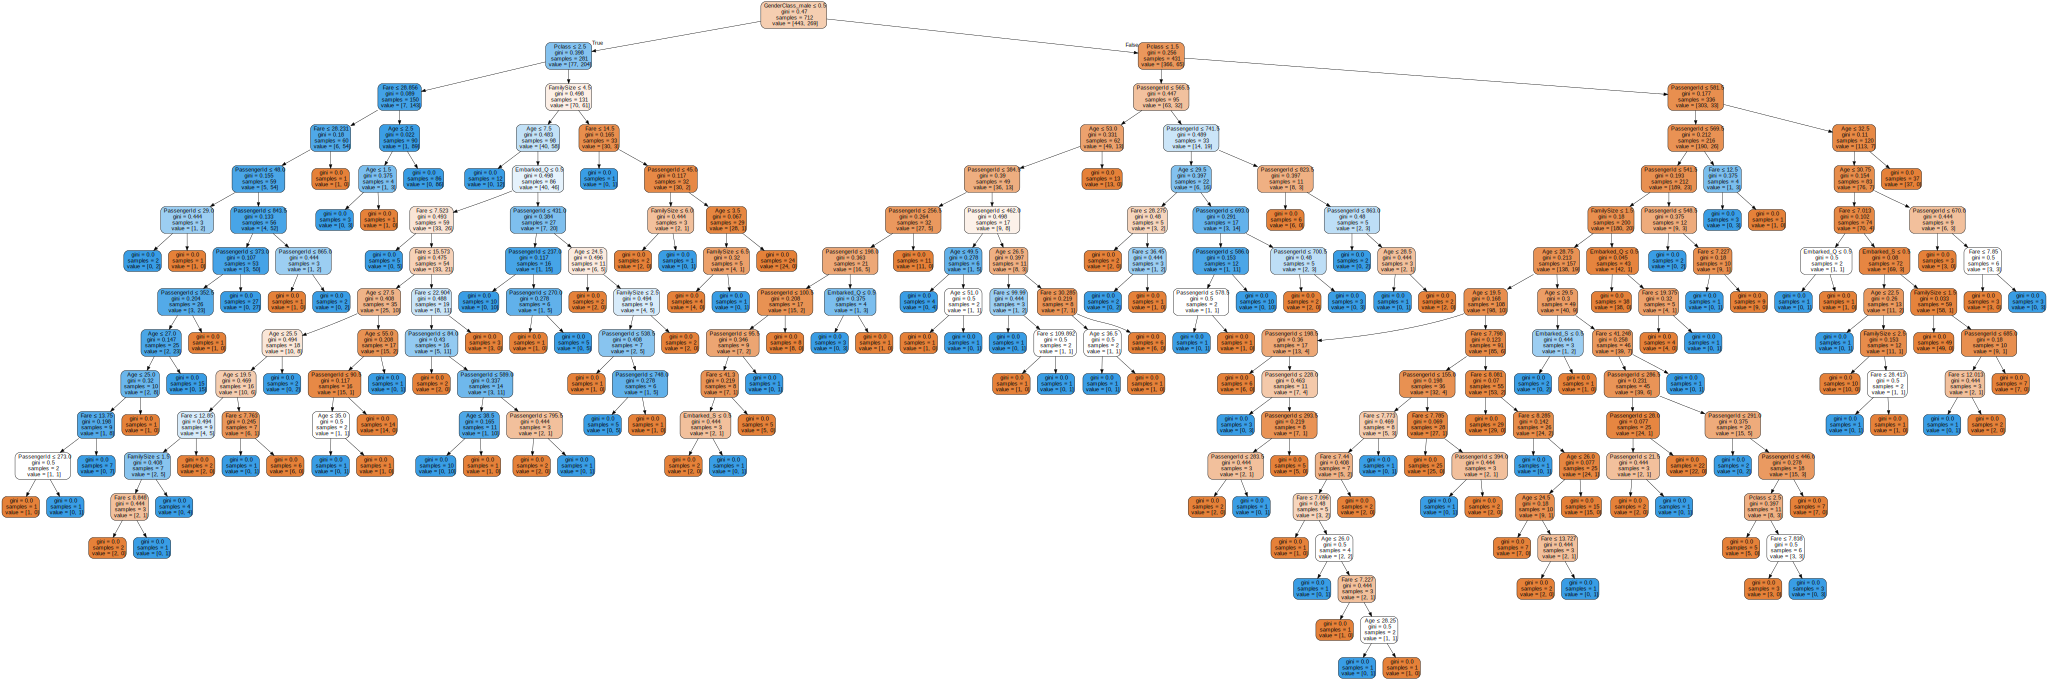

In [44]:
# Plotting our model of decision tree
import graphviz
from graphviz import Source
graph = Source( tree.export_graphviz(model, out_file=None,filled=True, 
                                rounded=True,  
                                special_characters=True, feature_names=X.columns))
graph.format = 'png'
graph.render('dtree_render',view=True)
graph

In [45]:
# Using the Model for Prediction
y_pred_train = model.predict(X_train)  
y_pred_test = model.predict(X_test)  

In [46]:
#  Model evaluation
# Model Evaluation using accuracy_score
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

Accuracy score for test data is: 0.776536312849162


In [47]:
# Model Evaluation using confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

confusion_matrix.index = ['Actual Died','Actual Survived']
confusion_matrix.columns = ['Predicted Died','Predicted Survived']
print(confusion_matrix)
# This means 88 + 51 = 139 correct predictions & 22 + 18 = 40 false predictions.

                 Predicted Died  Predicted Survived
Actual Died                  88                  18
Actual Survived              22                  51


In [48]:
# Decision Tree with Gridsearch
# You can change other parameters also and compare the impact of it via calculating accuracy score & confusion matrix

param_dist ={
 "criterion" : ["gini","entropy"],
 "max_depth" : [1,2,3,4,5,6,7,None]
}

In [51]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model, param_grid=param_dist, cv=10, n_jobs=-1)
grid.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None]})

In [52]:
grid.best_estimator_ # max depth = 3, criterion=gini

DecisionTreeClassifier(max_depth=3, random_state=0)

In [53]:
grid.best_score_

0.8245696400625977

In [54]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [55]:
y_pred_test11 = grid.predict(X_test)

In [56]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test11))

Accuracy score for test data is: 0.7821229050279329


In [57]:
# Using the model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier(random_state = 0)


tree_para = [{'criterion':['gini','entropy'],'max_depth': range(2,60),
                             'max_features': ['sqrt', 'log2', None] }]
                            
                            

grid_search = GridSearchCV(decision_tree_classifier,tree_para, cv=10, refit='AUC')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 60),
                          'max_features': ['sqrt', 'log2', None]}],
             refit='AUC')

In [58]:
y_pred_test1 = grid_search.predict(X_test)

In [59]:
# Model Evaluation using accuracy_score
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test1))

Accuracy score for test data is: 0.8044692737430168


In [60]:
# Model Evaluation using confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test1))

confusion_matrix.index = ['Actual Died','Actual Survived']
confusion_matrix.columns = ['Predicted Died','Predicted Survived']
print(confusion_matrix)

                 Predicted Died  Predicted Survived
Actual Died                  95                  11
Actual Survived              24                  49


You can see 95 + 49 = 144 correct predictions & 24 + 11 = 35 false predictions.

Observations:

With gridsearch accuracy_score increased from 0.765 to 0.804 and the number of correct predictions increased from 139 to 144 and number of false predictions decreased from 40 to 35.